<h1><span class="tocSkip"></span>Table of Contents</h1>

* <a href="#Importing-Libraries">1 Importing Libraries</a>

* <a href="#Pre-installing-Required-Functions">2 Pre-installing Required Functions</a>

* <a href="#1-Dimensional-Tensors">3 1 Dimensional Tensors</a>

* <a href="#Vector-Operations">4 Vector Operations</a>

* <a href="#2-Dimensional-Tensors">5 2 Dimensional Tensors</a>

* <a href="#Slicing-3D-Tensors">6 Slicing 3D Tensors</a>

* <a href="#Matrix-Multiplication">7 Matrix Multiplication</a>

* <a href="#Gradient-with-PyTorch">8 Gradient with PyTorch</a>

# Importing Libraries

In [1]:
import matplotlib as mpl
import numpy as np
import colorsys
import torch
import matplotlib.pyplot as plt

# Pre-installing Required Functions

In [2]:
bg_color = '#fdfcf6'

custom_params = {
    'axes.facecolor': bg_color,
    'axes.edgecolor': 'white',
    'axes.grid': True,
    'axes.axisbelow': True,
    'figure.facecolor': bg_color,
    'grid.color': 'white',
    'grid.linestyle': '-',
    'grid.linewidth': 2,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'patch.edgecolor': 'w',
    'patch.force_edgecolor': True,
    'axes.spines.right': False,
    'axes.spines.top': False
}

mpl.rcParams.update(custom_params)

In [3]:
def bright_colors(n):
    colors = []
    random_degree = np.random.random()
    hue = np.repeat(random_degree / n, n)
    hue_interval = np.linspace(0, 1, n, endpoint=False)
    saturation = 0.875 + np.random.random() / 8.0 * np.random.choice([-1, 1])
    lightness = 0.625 + np.random.random() / 8.0 * np.random.choice([-1, 1])
    h = hue + hue_interval
    s = np.repeat(saturation, n)
    l = np.repeat(lightness, n)
    array_hls = np.concatenate((h, l, s)).reshape(-1, n).T
    for hls in array_hls:
        r, g, b = [
            int(256 * e) for e in colorsys.hls_to_rgb(hls[0], hls[1], hls[2])
        ]
        colors.append('#%02X%02X%02X' % (r, g, b))
    return colors

# 1 Dimensional Tensors

In [4]:
v = torch.tensor([1, 2, 3, 4, 5, 6])
print(v)
print(v.dtype)
print(v.type())

tensor([1, 2, 3, 4, 5, 6])
torch.int64
torch.LongTensor


In [5]:
print(v[0])
print(v[1:-1])
print(v[-1])

tensor(1)
tensor([2, 3, 4, 5])
tensor(6)


In [6]:
f = torch.FloatTensor([1, 2, 3, 4, 5, 6])
print(f)
print(f.dtype)
print(f.type())

tensor([1., 2., 3., 4., 5., 6.])
torch.float32
torch.FloatTensor


In [7]:
print(v.view(6, 1))

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


In [8]:
print(v.view(3, 2))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [9]:
print(v.view(3, -1))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [10]:
a = np.array([1, 2, 3, 4, 5, 6])
tensor_cnv = torch.from_numpy(a)
print(tensor_cnv)
print(tensor_cnv.type())

tensor([1, 2, 3, 4, 5, 6])
torch.LongTensor


In [11]:
numpy_cnv = tensor_cnv.numpy()
print(numpy_cnv)
print(type(numpy_cnv))

[1 2 3 4 5 6]
<class 'numpy.ndarray'>


# Vector Operations

In [12]:
t_one = torch.tensor([1, 2, 3])
t_two = torch.tensor([1, 2, 3])
print(t_one + t_two)
print(t_one * t_two)
print(t_one * 5)

tensor([2, 4, 6])
tensor([1, 4, 9])
tensor([ 5, 10, 15])


In [13]:
dot_product = torch.dot(t_one, t_two)
print(dot_product)

tensor(14)


In [14]:
x = torch.linspace(0, 10, 5)
y = torch.exp(x)
print(x)
print(y)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
tensor([1.0000e+00, 1.2182e+01, 1.4841e+02, 1.8080e+03, 2.2026e+04])


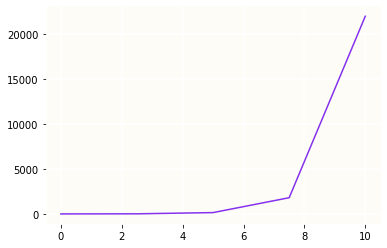

In [15]:
colors = bright_colors(1)
plt.plot(x.numpy(), y.numpy(), c=colors[0])

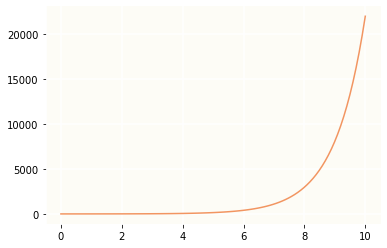

In [16]:
x = torch.linspace(0, 10, 100)
y = torch.exp(x)
colors = bright_colors(1)
plt.plot(x.numpy(), y.numpy(), c=colors[0])

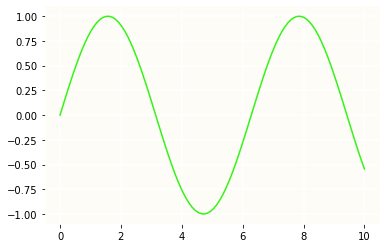

In [17]:
y = torch.sin(x)
colors = bright_colors(1)
plt.plot(x.numpy(), y.numpy(), c=colors[0])

# 2 Dimensional Tensors

In [18]:
one_d = torch.arange(2, 7)
print(one_d)

tensor([2, 3, 4, 5, 6])


In [19]:
one_d = torch.arange(2, 7, 2)
print(one_d)

tensor([2, 4, 6])


In [20]:
one_d = torch.arange(0, 9)
print(one_d)
print(one_d.dim())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
1


In [21]:
two_d = one_d.view(3, 3)
print(two_d)
print(two_d.dim())

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
2


In [22]:
print(two_d[0])
print(two_d[:, 0])
print(two_d[0, 0])
print(two_d[1, 2])

tensor([0, 1, 2])
tensor([0, 3, 6])
tensor(0)
tensor(5)


In [23]:
three_d = torch.arange(18).view(2, 3, 3)
print(three_d)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])


In [24]:
three_d = torch.arange(18).view(3, 2, 3)
print(three_d)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])


In [25]:
three_d = torch.arange(18).view(3, 3, 2)
print(three_d)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])


In [26]:
three_d = torch.arange(36).view(3, 3, 4)
print(three_d)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[24, 25, 26, 27],
         [28, 29, 30, 31],
         [32, 33, 34, 35]]])


# Slicing 3D Tensors

In [27]:
three_d = torch.arange(18).view(3, 2, 3)
print(three_d)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])


In [28]:
print(three_d[1, 1, 1])

tensor(10)


In [29]:
print(three_d[1, 0:2, 1:3])

tensor([[ 7,  8],
        [10, 11]])


In [30]:
print(three_d[1, 0:2, 0:3])

tensor([[ 6,  7,  8],
        [ 9, 10, 11]])


In [31]:
print(three_d[1, :, :])

tensor([[ 6,  7,  8],
        [ 9, 10, 11]])


# Matrix Multiplication

In [32]:
mat_a = torch.tensor([0, 3, 5, 5, 5, 2]).view(2, 3)
print(mat_a)

tensor([[0, 3, 5],
        [5, 5, 2]])


In [33]:
mat_b = torch.tensor([3, 4, 3, -2, 4, -2]).view(3, 2)
print(mat_b)

tensor([[ 3,  4],
        [ 3, -2],
        [ 4, -2]])


In [34]:
print(torch.matmul(mat_a, mat_b))

tensor([[ 29, -16],
        [ 38,   6]])


In [35]:
print(mat_a @ mat_b)

tensor([[ 29, -16],
        [ 38,   6]])


# Gradient with PyTorch

In [36]:
x = torch.tensor(2.0)
print(x)

tensor(2.)


In [37]:
x = torch.tensor(2.0, requires_grad=True)
print(x)

tensor(2., requires_grad=True)


In [38]:
y = 9 * x**4 + 2 * x**3 + 3 * x**2 + 6 * x + 1
y.backward()
print(x.grad)

tensor(330.)


In [39]:
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3
y.backward()
print(x.grad)
print(z.grad)

tensor(2.)
tensor(12.)
